<a href="https://colab.research.google.com/github/MatteoGandetto/Corso_Python_new/blob/master/Regressione_Lineare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mounting Google Drive in Runtime Machine**

In [0]:
from google.colab import drive
drive.mount('/content/drive')



---



---


**Install Libraries**

In [0]:
!pip install --upgrade -q gspread
!pip install gspread-dataframe



---
---


**Import Libraries**

In [0]:
# package for scientific computing
import numpy as np

#collection of command style functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt 

#data analysis and manipulation tool
import pandas as pd 

#Python API for Google Sheets
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe

In [0]:
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
gs=gspread.authorize(GoogleCredentials.get_application_default())



---
---
**Load GoogleSheet data into a dataFrame and plot them**

{'boxes': [<matplotlib.lines.Line2D at 0x7f4240422240>],
 'caps': [<matplotlib.lines.Line2D at 0x7f42408722b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4240872a90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4240872780>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4240422198>,
  <matplotlib.lines.Line2D at 0x7f4240422400>]}

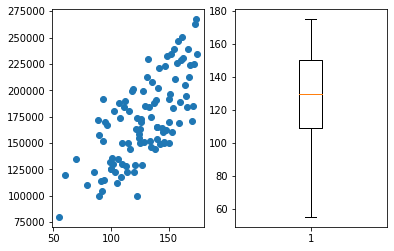

In [49]:
FILE_NAME='Regressione_IN'
wks=gs.open(FILE_NAME).sheet1
INPUT_df=get_as_dataframe(wks)

#remove all NaN
INPUT_df=INPUT_df.dropna(1,'all')
INPUT_df=INPUT_df.dropna(0,'all')

#convert to NumPy array
np_IN=np.array(INPUT_df)
np_IN_X=np_IN[:,0]
np_IN_Y=np_IN[:,1]

#plot data
fig, axs = plt.subplots(1,2)
axs[0].scatter(np_IN_X, np_IN_Y)
axs[1].boxplot(np_IN_X)




---

---

Machine Learning
**ALGORITMO DI REGRESSIONE LINEARE**



0.5722590531843716


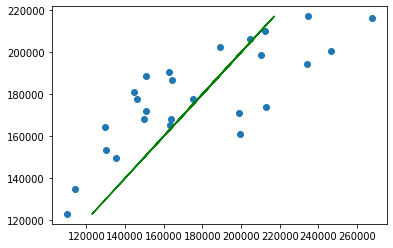

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#split dataset in training part and test part
# if train_size and test_size are not defined,the train_size=0.75 and test_size=0.25
X_train, X_test, y_train, y_test = train_test_split(np_IN_X,np_IN_Y)

#reshape features to be used with LinearRegression's methods
X_train_r=np.reshape(X_train,(-1, 1))
X_test_r=np.reshape(X_test,(-1, 1))

#train the linear regressor
reg = LinearRegression().fit(X_train_r, y_train)

#y_pred is a linear prediction of X_test
y_pred=reg.predict(X_test_r)

#evaluate the model by using R=1-RSE
score=reg.score(X_test_r,y_test)
print (score)

#show the solution
plt.scatter(y_test,y_pred)
plt.plot(y_pred,y_pred,color='green')
plt.show()